In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
bitcoin_path = "Resources/coin_Bitcoin.csv"
ethereum_path = "Resources/coin_Ethereum.csv"
cardano_path = "Resources/coin_Cardano.csv"
dogecoin_path = "Resources/coin_Dogecoin.csv"
polkadot_path = "Resources/coin_Polkadot.csv"

# Read the crypto history data and form dataframes
bitcoinData = pd.read_csv(bitcoin_path)
ethereumData = pd.read_csv(ethereum_path)
cardanoData = pd.read_csv(cardano_path)
dogecoinData = pd.read_csv(dogecoin_path)
polkadotData = pd.read_csv(polkadot_path)

bitData_df = pd.DataFrame(bitcoinData)
ethData_df = pd.DataFrame(ethereumData)
anaData_df = pd.DataFrame(cardanoData)
dogeData_df = pd.DataFrame(dogecoinData)
dotData_df = pd.DataFrame(polkadotData)
bitData_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


The r-squared is: 0.6600312227661678


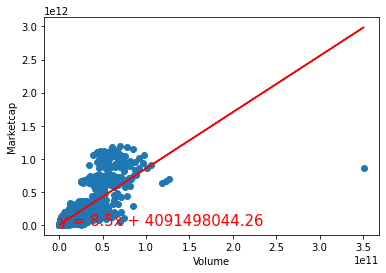

In [39]:
# Correlation between volume and marketcap with regression line (for David)

completeData_df = pd.concat([bitData_df,ethData_df,anaData_df,dogeData_df,dotData_df])
#completeData_df["Date"] = pd.to_datetime(allCoins_df["Date"], format="%Y-%m-%d %H:%M:%S")
#completeData_df["Year"] = completeData_df["Date"].dt.year
completeVol_df = completeData_df[["Date","Volume"]]
completeMC_df = completeData_df[["Date","Marketcap"]]
completeData_df

# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


# Add the linear regression equation and line to plot
x_values = completeData_df['Volume']
y_values = completeData_df['Marketcap']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Volume')
plt.ylabel('Marketcap')
print(f"The r-squared is: {rvalue**2}")
plt.show()